<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguaje Natural

## Taller #7: Clasificación de textos
`Fecha de entrega: Abril 22, 2021. (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`

In [33]:
import re
import json
import pandas as pd

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

!pip install plotly
!pip install cufflinks
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot

In [6]:
# Cargar datos
path = 'reviews_vidjew_es.csv'
data = pd.read_csv(path)
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games


### `[8 pts]` Punto 1: Dividir el conjunto de datos en entrenamiento y prueba

In [8]:
train, test = train_test_split(data, test_size=0.2, random_state=28)
#train, test 
print(f"El conjunto de datos de entrenamiento esta compuesto por {train.shape[0]} registros")
print(f"El conjunto de datos de prueba esta compuesto por {test.shape[0]} registros")

El conjunto de datos de entrenamiento esta compuesto por 800 registros
El conjunto de datos de prueba esta compuesto por 200 registros


###  `[8 pts]` Punto 2: Hacer pre-procesamiento del texto

In [17]:
stopwords_sp = stopwords.words('spanish')

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = " ".join([palabra for palabra in texto.split() if palabra not in stopwords_sp])
    return texto

tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)

In [18]:
X_train = tfidf_vect.fit_transform(train.review_body.values)
y_train = train.product_category.values
 
X_test = tfidf_vect.transform(test.review_body.values)
y_test = test.product_category.values

###  `[10 pts]` Punto 3: Entrenar el modelo
Puedes escoger el que quieras: Regresión Logística, Naive-Bayes, SVM, Árbol de Decisión, u otro.

In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
nb = MultinomialNB()
svm = LinearSVC(class_weight='balanced')

In [23]:
# Entrenamos los modelos
nb.fit(X_train, y_train)
svm.fit(X_train, y_train);

###  `[10 pts]` Punto 4: Métricas de evaluación
Exactitud, precisión y sensibilidad

In [24]:
y_pred_nb = nb.predict(X_test)
y_pred_svm = svm.predict(X_test)

#Exactitud:
print(f"Naive Bayes: {accuracy_score(y_test, y_pred_nb):>15.2f}")
print(f"SVM: {accuracy_score(y_test, y_pred_svm):>23.2f}")

Naive Bayes:            0.84
SVM:                    0.84


In [25]:
#Precision y Sensibilidad
metricas = [precision_score, recall_score]

for metrica in metricas:
    print(metrica.__name__)
    print(f"Naive Bayes: {metrica(y_test, y_pred_nb, pos_label='video_games'):>15.2f}")
    print(f"SVM: {metrica(y_test, y_pred_svm, pos_label='video_games'):>23.2f}")
    print()

precision_score
Naive Bayes:            0.88
SVM:                    0.86

recall_score
Naive Bayes:            0.78
SVM:                    0.79



###  `[BONUS: 3 pts]` Matriz de confusión

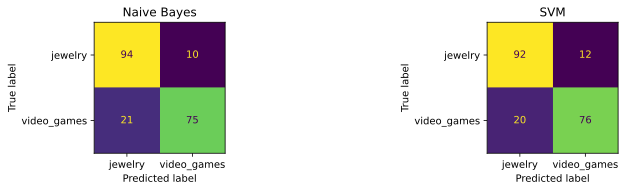

In [32]:
%config InlineBackend.figure_format = 'svg'
 
fig = plt.figure(figsize=(10,10))


ax1 = fig.add_subplot(1,3,1)
plot_confusion_matrix(nb, X_test, y_test, cmap = 'viridis', ax=ax1).im_.colorbar.remove()
plt.title("Naive Bayes")

ax2 = fig.add_subplot(1,3,3)
plot_confusion_matrix(svm, X_test, y_test, cmap = 'viridis', ax=ax2).im_.colorbar.remove() 
plt.title("SVM");

###  `[12 pts]` Punto 5: Términos más importantes de cada categoría

In [28]:
vocab = {value:key for key, value in tfidf_vect.vocabulary_.items()}

In [29]:
## Palabras más importantes
[(vocab[e[0]], round(e[1],2)) for e in zip(nb.coef_[0].argsort(),sorted(nb.coef_[0]))][-10:]

[('funciona', -6.47),
 ('jugar', -6.45),
 ('buen', -6.39),
 ('mando', -6.35),
 ('precio', -6.27),
 ('si', -6.23),
 ('producto', -6.05),
 ('perfecto', -6.02),
 ('bien', -5.87),
 ('juego', -5.55)]

### `[2 pts]` Punto 6: Pregunta

- ¿Qué interpretación y/o conclusiones saca de su modelo?

In [ ]:
Se observa que el porcentaje de exactitud para SVM y NB es el mismo con un 84%, mientras que en las
metricas de sensibilidad y precisión para ambos si hay diferencias para SVM precision_score es 86%
y NB 88% y recall_score para SVM precision_score es 79% y NB 78%, con estos resultados el más adecuado para el tipo de datos
seria NB puesto que en las metrica de precisión obtuvo un mejor resultado y por el conjunto de datos
que se tiene se requiere una mayor exactitud y precisión por encima de una sensibilidad.
